In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from numpy import * ;
import pandas as pd
import numpy as np
import scipy.linalg
import os
# 读取数据
def load_csv(path):
    data_read = pd.read_csv(path)
    print(data_read.describe())
    list = data_read.values.tolist()
    data = np.array(list)
    print(data.shape)
    # print(data)
    return data




In [2]:
AFile = "randn_data_regression_A.csv"
BFile = "randn_data_regression_b.csv"
A = load_csv(AFile)
B = load_csv(BFile)
rows = A.shape[0]
cols = A.shape[1]
# 拓展矩阵第1列设置为1
A=mat(np.c_[np.ones((rows,1)),A])
rows = A.shape[0]
cols = A.shape[1]
B = mat(B)
print(A.shape)
print(B.shape)
#创建theta矩阵
theta = np.zeros((cols,1))
print(theta.shape)


       -0.432564812  -1.010633706  -1.187777016  -0.119869428  0.635274135  \
count     49.000000     49.000000     49.000000     49.000000    49.000000   
mean       0.048962      0.078306     -0.215327     -0.017184    -0.043375   
std        0.983680      0.747673      0.901642      0.991961     1.028094   
min       -2.170674     -1.873990     -2.202321     -2.054325    -2.364590   
25%       -0.691776     -0.350975     -0.989760     -0.627531    -0.644679   
50%        0.125332      0.118445     -0.262440     -0.079330    -0.011787   
75%        0.714325      0.591283      0.327368      0.535398     0.586939   
max        2.183186      1.692430      1.488490      2.112160     2.309287   

       0.990114872  -0.896042506  0.440909643  -0.071539489  -0.116988909  \
count    49.000000     49.000000    49.000000     49.000000     49.000000   
mean     -0.149313     -0.034999     0.024138     -0.002479     -0.294872   
std       0.889266      0.949705     1.062459      1.068394      0

# 1)	方法一：解线性方程组计算得到线性回归模型的参数

#求解线性方程组求解方法
#一 python自带函数求解 
#报错 因为必须是 方阵, 也就是行数等于列数
#theta = scipy.linalg.solve(A,B)
#二 使用自己写的迭代法求解线性方程组的方法求解, 我是之前用matlab写的, 所以需要重新写 也必须是方阵?

#AX = b  https://blog.csdn.net/skj1995/article/details/90114611 可逆的判断

In [60]:


before = A.T * A
if (np.linalg.det(before)!=0):
    theta = before.I*A.T*B 
    #θ=(x^-1X)^-1X^Ty
    print(theta)
else:
    #可以看到A数据的组数比特征少
    print("矩阵不可逆,请采用梯度下降法或加正则项")
    

矩阵不可逆,请采用梯度下降法或加正则项


# 2)	方法二：利用梯度下降法计算线性回归模型的参数。

In [61]:
def gradientDescent(X, y, theta, learning_rate, num_iters, tol,print_step):
    #参数说明: X数据, y预测目标值, theta参数,learinig_rate 学习率  num_iters迭代次数 tol精度(0.01)
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        n = len(theta)
        theta_temp = theta
#         print((X.dot(theta)-y).shape)
#         print(X[:,1].shape)
        for j in range(n):
            theta_temp[j] = theta[j] - learning_rate/m*(X.dot(theta)-y).T.dot(X[:,j]); 
        theta = theta_temp 
        cost = computeCost(X, y, theta)
        J_history[i] = cost
        if(i%print_step==0):
            print('第%d次迭代, cost = %f' %(i,cost))
        if(cost < tol): #如果cost 偏差值 小于精确值 则退出
            print('迭代训练结束,迭代次数:%d, 偏差值cost=%f'%(i,cost))
            return (theta,J_history)
    
    return (theta,J_history)

In [55]:
#计算偏差值
def computeCost(X,y,theta):
    # 这里均方误(欧式距离)差求偏差
    m = len(y) #number of training examples
    
    inner = np.power(((X.dot(theta)) - y), 2) # (pred - y)^2
    
    return np.sum(inner) / (2 * m)
    

In [56]:
# 这里是求解 方法二

# 第一部分: 设定传入参数
n = rows
m = cols
X0 = theta

A = A
B = B
theta = np.zeros((m,1))
learning_rate = 0.01
step = 2000
tol = 0.001
print_step = 10

#不可逆还可以使用加正则化项来做, 先写梯度下降方法吧

# 第二部分: 梯度下降方法
(theta,J_hist) = gradientDescent(A,B,theta,learning_rate,step,tol,print_step)
#print(theta)

第0次迭代, cost = 243.768989
第10次迭代, cost = 44.050490
第20次迭代, cost = 10.552179
第30次迭代, cost = 2.902350
第40次迭代, cost = 0.855970
第50次迭代, cost = 0.262709
第60次迭代, cost = 0.082717
第70次迭代, cost = 0.026514
第80次迭代, cost = 0.008612
第90次迭代, cost = 0.002826
第100次迭代, cost = 0.000935
迭代训练结束,迭代次数:100, 偏差值cost=0.000935


In [57]:
print(theta)

[[ 2.04634351e-01]
 [ 1.62400894e-02]
 [ 9.29961461e-02]
 [ 6.73010774e-02]
 [ 7.30270308e-01]
 [ 8.61464231e-01]
 [-3.06918121e-01]
 [-8.99312104e-03]
 [ 7.95697883e-01]
 [ 4.17147141e-01]
 [-6.30807306e-01]
 [-9.53032181e-02]
 [ 2.89267106e-01]
 [ 6.69853466e-01]
 [-2.12305784e-02]
 [ 4.93088308e-01]
 [ 1.35576311e-01]
 [-2.74558161e-01]
 [ 4.94648693e-01]
 [-4.59965800e-02]
 [ 6.08435859e-01]
 [ 4.86572210e-01]
 [ 8.08605003e-01]
 [ 7.12989582e-01]
 [-3.02549774e-01]
 [-8.31883374e-02]
 [ 1.55373770e-01]
 [ 7.16539711e-01]
 [ 3.44417789e-01]
 [ 7.08536863e-01]
 [ 4.95973160e-01]
 [ 3.82168021e-01]
 [-3.13244724e-01]
 [ 1.22889921e+00]
 [ 1.86272622e-01]
 [ 2.08047527e-02]
 [ 5.42738922e-01]
 [ 4.23724920e-01]
 [ 8.12797121e-01]
 [ 6.98345100e-01]
 [ 9.15665448e-02]
 [ 2.68957265e-02]
 [ 2.75499784e-01]
 [ 9.40905345e-01]
 [ 4.76747893e-02]
 [ 7.14117737e-01]
 [ 6.47808839e-01]
 [ 8.01784937e-02]
 [ 8.12837739e-01]
 [ 7.32994728e-01]
 [ 1.64845760e-01]
 [ 2.69518667e-01]
 [-8.5360819

2000


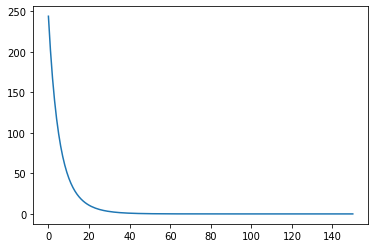

In [58]:
print(J_hist.size)

x_axis = np.linspace(0,150,150)
plt.plot(x_axis,J_hist[0:150])

# 3)	在线性回归模型中加入正则化项 ，实现计算过程。 

#正则化之后 对于 梯度下降法和 normalequation 正规方程方法算法都有所改变

#好处是对于梯度下降 可以避免 过拟合

#对于normalequation 可以直接求出,不可逆的问题消失了 数学上的证明 比较高深..

#下面写求解
#先给出正规方程的求解
#再修改函数适应正则化



## 正规方程求解


In [59]:
Regularization_Parameter = 1


before = A.T * A+Regularization_Parameter*np.eye(cols)
print(before.size)
if (np.linalg.det(before)!=0):
    print('嘿嘿,加上就可逆了,瞬间求出,看看数量级基本相同参数位置和梯度下降方法求解的是一致的')
    theta = before.I*A.T*B 
    #θ=(x^-1X)^-1X^Ty
    print(theta)
    

251001
嘿嘿,加上就可逆了,瞬间求出,看看数量级基本相同参数位置和梯度下降方法求解的是一致的
[[ 1.91105718e-01]
 [ 1.38228138e-02]
 [ 8.87805096e-02]
 [ 5.15552592e-02]
 [ 6.97645377e-01]
 [ 8.22321331e-01]
 [-2.97682812e-01]
 [-6.99771743e-03]
 [ 7.60504091e-01]
 [ 4.02088502e-01]
 [-6.05558181e-01]
 [-9.85914265e-02]
 [ 2.85109995e-01]
 [ 6.50452153e-01]
 [-1.73537776e-02]
 [ 4.74840468e-01]
 [ 1.26846271e-01]
 [-2.57215652e-01]
 [ 4.71495965e-01]
 [-3.53374343e-02]
 [ 5.87773603e-01]
 [ 4.84782297e-01]
 [ 7.77023078e-01]
 [ 6.94140275e-01]
 [-2.85080636e-01]
 [-8.50840457e-02]
 [ 1.61033772e-01]
 [ 6.93865542e-01]
 [ 3.34486511e-01]
 [ 6.89247830e-01]
 [ 4.73454395e-01]
 [ 3.63112352e-01]
 [-3.10833987e-01]
 [ 1.18308590e+00]
 [ 1.73653361e-01]
 [ 2.27667118e-02]
 [ 5.20458415e-01]
 [ 4.08106821e-01]
 [ 7.98166795e-01]
 [ 6.78951774e-01]
 [ 8.47887361e-02]
 [ 1.13951547e-02]
 [ 2.65804009e-01]
 [ 9.08392092e-01]
 [ 5.28263152e-02]
 [ 6.93253265e-01]
 [ 6.23598427e-01]
 [ 7.17934353e-02]
 [ 7.87432851e-01]
 [ 7.11476125e-01]


## 梯度下降求解

In [31]:
#计算偏差值
def computeCostWithRegularization(X,y,theta,Regularization_Parameter):
    # 加正则化项的计算cost
    m = len(y) #number of training examples
    
    inner = np.power(((X * theta) - y), 2)+ Regularization_Parameter*sum(np.power(theta, 2))
    
    return np.sum(inner) / (2 * m)
    

In [32]:
def gradientDescentWithRegularization(X, y, theta, learning_rate, num_iters, tol,print_step,Regularization_Parameter):
    #参数说明: X数据, y预测目标值, theta参数,learinig_rate 学习率  num_iters迭代次数 tol精度(0.01)
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        n = len(theta)
        theta_temp = theta
        for j in range(n):
            theta_temp[j] = theta[j] - learning_rate/m*(X*theta-y).T*X[:,j];
        theta = theta_temp 
        cost = computeCostWithRegularization(X, y, theta,Regularization_Parameter)
        J_history[i] = cost
        
        if(i%print_step==0):
            print('第%d次迭代, cost = %f' %(i,cost))
        if((i>1) and (abs(J_history[i-1]-cost) < tol)): # 这里退出的判断条件改为和前一个cost 小于精确值就退出
            print(J_history[i-1]-cost)
            print(tol)
            print('迭代训练结束,迭代次数:%d, 偏差值cost=%f'%(i,cost))
            return (theta,J_history)
    
    return (theta,J_history)

In [44]:

A = A
B = B
theta = np.zeros((m,1))
learning_rate = 0.01
step = 2000
tol = 0.001
print_step = 10
Regularization_Parameter = 1
(theta,J_hist) = gradientDescentWithRegularization(A,B,theta,learning_rate,step,tol,print_step,Regularization_Parameter)

第0次迭代, cost = 244.031603
第10次迭代, cost = 56.621995
第20次迭代, cost = 33.184892
第30次迭代, cost = 31.073771
第40次迭代, cost = 31.961966
第50次迭代, cost = 32.928771
第60次迭代, cost = 33.586310
第70次迭代, cost = 33.984265
第80次迭代, cost = 34.214863
第90次迭代, cost = 34.346122
第100次迭代, cost = 34.420328
第110次迭代, cost = 34.462209
第120次迭代, cost = 34.485865
第130次迭代, cost = 34.499253
[-0.00096696]
0.001
迭代训练结束,迭代次数:131, 偏差值cost=34.500220


In [45]:
print(theta)


[[ 2.04666302e-01]
 [ 1.61249332e-02]
 [ 9.30553640e-02]
 [ 6.70670858e-02]
 [ 7.30796009e-01]
 [ 8.61900937e-01]
 [-3.07332789e-01]
 [-8.83860259e-03]
 [ 7.95862421e-01]
 [ 4.18091221e-01]
 [-6.31336530e-01]
 [-9.56499981e-02]
 [ 2.90437097e-01]
 [ 6.70863624e-01]
 [-2.11565216e-02]
 [ 4.93752461e-01]
 [ 1.35858406e-01]
 [-2.74904383e-01]
 [ 4.95111496e-01]
 [-4.50564692e-02]
 [ 6.08876754e-01]
 [ 4.87821477e-01]
 [ 8.09496085e-01]
 [ 7.14196400e-01]
 [-3.02412190e-01]
 [-8.29577998e-02]
 [ 1.56149271e-01]
 [ 7.17258787e-01]
 [ 3.44923772e-01]
 [ 7.10177794e-01]
 [ 4.96665399e-01]
 [ 3.81723892e-01]
 [-3.14777947e-01]
 [ 1.23004478e+00]
 [ 1.86210764e-01]
 [ 2.20831805e-02]
 [ 5.42419045e-01]
 [ 4.24329195e-01]
 [ 8.14323515e-01]
 [ 6.98341520e-01]
 [ 9.18270260e-02]
 [ 2.65105913e-02]
 [ 2.75338361e-01]
 [ 9.42550384e-01]
 [ 4.86725782e-02]
 [ 7.15104696e-01]
 [ 6.47317751e-01]
 [ 7.95648658e-02]
 [ 8.13600478e-01]
 [ 7.33785193e-01]
 [ 1.65085465e-01]
 [ 2.69820805e-01]
 [-8.6122377

2000


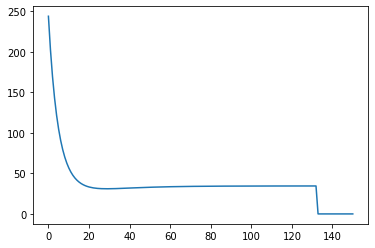

In [46]:

print(J_hist.size)
x_axis = np.linspace(0,150,150)
plt.plot(x_axis,J_hist[0:150]) # 

# 2.	对randn_data_regression_A的某一列乘上一个很大的数（比如100000），再调用梯度下降法计算线性回归模型的参数，你有什么发现？你觉得如何处理才有可能降低梯度下降法的迭代步数？

In [ ]:

# 这里是求解 方法二

# 第一部分: 设定传入参数
n = rows
m = cols
X0 = theta

A1 = np.array(A, copy=True)
A1[:,2] = A1[:,2]*100
A1 = mat(A1)
print(A)
print(A1)

In [48]:

B = B
theta = np.zeros((m,1))
learning_rate = 0.0003 #经过调整这个rate 大小比较合适 0.001太大 0.0001 太慢 0.0003算快
step = 5000
tol = 0.001
print_step = 10

# 梯度下降方法
(theta,J_hist) = gradientDescent(A1,B,theta,learning_rate,step,tol,print_step)
#print(theta)

第0次迭代, cost = 293.981012
第10次迭代, cost = 277.063735
第20次迭代, cost = 261.442090
第30次迭代, cost = 246.808642
第40次迭代, cost = 233.094711
第50次迭代, cost = 220.236776
第60次迭代, cost = 208.176025
第70次迭代, cost = 196.857988
第80次迭代, cost = 186.232200
第90次迭代, cost = 176.251893
第100次迭代, cost = 166.873704
第110次迭代, cost = 158.057421
第120次迭代, cost = 149.765733
第130次迭代, cost = 141.964014
第140次迭代, cost = 134.620115
第150次迭代, cost = 127.704180
第160次迭代, cost = 121.188467
第170次迭代, cost = 115.047192
第180次迭代, cost = 109.256381
第190次迭代, cost = 103.793735
第200次迭代, cost = 98.638504
第210次迭代, cost = 93.771374
第220次迭代, cost = 89.174359
第230次迭代, cost = 84.830704
第240次迭代, cost = 80.724794
第250次迭代, cost = 76.842072
第260次迭代, cost = 73.168959
第270次迭代, cost = 69.692787
第280次迭代, cost = 66.401733
第290次迭代, cost = 63.284753
第300次迭代, cost = 60.331533
第310次迭代, cost = 57.532435
第320次迭代, cost = 54.878445
第330次迭代, cost = 52.361135
第340次迭代, cost = 49.972619
第350次迭代, cost = 47.705514
第360次迭代, cost = 45.552907
第370次迭代, cost = 43.508323
第38

第3160次迭代, cost = 0.001958
第3170次迭代, cost = 0.001894
第3180次迭代, cost = 0.001832
第3190次迭代, cost = 0.001773
第3200次迭代, cost = 0.001715
第3210次迭代, cost = 0.001660
第3220次迭代, cost = 0.001606
第3230次迭代, cost = 0.001554
第3240次迭代, cost = 0.001503
第3250次迭代, cost = 0.001454
第3260次迭代, cost = 0.001407
第3270次迭代, cost = 0.001362
第3280次迭代, cost = 0.001317
第3290次迭代, cost = 0.001275
第3300次迭代, cost = 0.001233
第3310次迭代, cost = 0.001193
第3320次迭代, cost = 0.001155
第3330次迭代, cost = 0.001117
第3340次迭代, cost = 0.001081
第3350次迭代, cost = 0.001046
第3360次迭代, cost = 0.001012
迭代训练结束,迭代次数:3364, 偏差值cost=0.000999


In [49]:
print(theta)


[[ 0.17920398]
 [ 0.03769754]
 [ 0.01571062]
 [ 0.04968849]
 [ 0.70920993]
 [ 0.84338537]
 [-0.29813319]
 [ 0.0050518 ]
 [ 0.76243362]
 [ 0.40694364]
 [-0.60218219]
 [-0.08743242]
 [ 0.28807187]
 [ 0.66062214]
 [-0.01078813]
 [ 0.51855851]
 [ 0.12769197]
 [-0.25315371]
 [ 0.45996678]
 [-0.03056517]
 [ 0.57548325]
 [ 0.47761665]
 [ 0.79753737]
 [ 0.68392113]
 [-0.26335685]
 [-0.07038375]
 [ 0.14161191]
 [ 0.71086982]
 [ 0.30632122]
 [ 0.68510775]
 [ 0.4908743 ]
 [ 0.37464192]
 [-0.30266095]
 [ 1.15315609]
 [ 0.15387126]
 [ 0.03387228]
 [ 0.52566686]
 [ 0.41576726]
 [ 0.80560635]
 [ 0.69002599]
 [ 0.05197054]
 [ 0.00256392]
 [ 0.25828691]
 [ 0.88249992]
 [ 0.03498854]
 [ 0.6703486 ]
 [ 0.64900487]
 [ 0.07811154]
 [ 0.80793892]
 [ 0.69239405]
 [ 0.16522308]
 [ 0.2354061 ]
 [-0.09541889]
 [-0.10259306]
 [-0.33261736]
 [ 0.46629166]
 [ 0.11958703]
 [-0.54903185]
 [-0.11157978]
 [ 0.28007356]
 [-0.01450945]
 [ 0.05192058]
 [ 0.02037394]
 [-1.00030843]
 [-0.04704326]
 [ 0.51294499]
 [-0.34947

5000


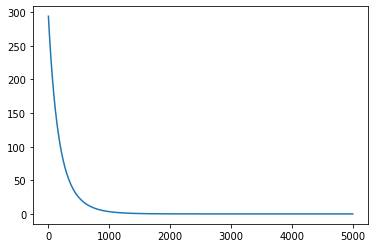

In [50]:

print(J_hist.size)
x_axis = np.linspace(0,5000,5000)
plt.plot(x_axis,J_hist[0:5000])

for line in locals()['In']:
    print(line)
    
后面的都是草稿, 还有一定价值,没删除

In [ ]:
#function [X,err,iter] = Gauss_S(A,X0,b,n,step,tol)
            #迭代法求解好像必须是n*n型的正定?
def jacobi(X,Y,tol,step):
    n = X.shape[1] # 获取维度 python操作
    m = X.shape[0]
    print('m row =',m)
    print('n col =',n)
    theta0 = np.zeros(n)# 创建0向量
    theta  = np.zeros(n)
    print('step =',step)
    for i in range(int(step)):
        err = 0
#         print('i=',i)
        for j in range(m):
            theta[j] = (Y[j]-X[j].dot(theta0)+X[j,j]*theta0[j])/X[j,j]
        theta0 = theta
        
        err = np.linalg.norm(X.dot(theta)-Y)
        if(err < tol):
            print("迭代训练结束,迭代次数:"+i+", 偏差值:"+err)
    return (theta,err)
        

In [ ]:

(theta,err) = jacobi(A,B,tol,step)

In [ ]:
print(A[1].size)
print(A[1,1].size)
print(A[1,:].size)
print(X0[1].size)
print(X0.size)

In [ ]:

    print(A.dot(X0))

In [ ]:
# 草稿部分 
#def jacobi(A,B,sigma,N):
#     n = len(A)
#     x0 = []
#     x = []
#     for i in range(0,n):
#         x0.append(0)
#         x.append(0)
#     for k in range(1,N+1):
#         R = 0
#         for i in range(0,n):
#             sum_ax = 0
#             for j in range(0,n):
#                 sum_ax = sum_ax + A[i][j] * x0[j]
#             x[i] = x0[i] + ((B[i] - sum_ax)/A[i][i])
#             if abs(x[i] - x0[i]) > R:
#                 R = abs(x[i] - x0[i])
#         if R <= sigma:
#             print("精确度等于",sigma,"时，jacobi迭代法需要迭代",k,"次收敛")
#             return (x,k)
#         for i in range(0,n):
#             x0[i] = x[i]
#     return (x,k)
# def Jacobi(A,X0,B,n,step,tol):
#     theta = X0
#     for i in range(step):
#         error=0
#         for j in range(n):
#             theta[j] = (B[j]-A[j,:]*X0+A[j,j]*X0[j])/A[j,j]
# #             print(theta[j])
# #             print(A[j,j])
#         X0 = theta
#         err = np.linalg.norm(A*theta-B-0)
#         if(err < tol):
#             print("迭代次数:"+i+", 偏差值:"+err)
# #AX = b Xθ=Y
# # def = jacobi(A,B,tol,step):
# #     n = A.ndim
# #     theta0 = np.zeros(n)
# #     theta  = np.zeros(n)
# #     for i in range(step):
# #         err = 0
# #         print('i=',i)
# #         for j in range(n):
# #             theta[j] = (B[j]-A[j].dot(theta0)+A[j,j]*theta0[j])/A[j,j]

# #         err = np.linalg.norm(A*theta-B-0)

        
            
        
# def jacobi(a,b,c=0.0001,d=30):
#     x1=np.zeros(a.shape[1])
#     x2=np.zeros(a.shape[1])
#     k=0
#     while k<d:
#         k=k+1
#         print('k=',k)
#         for i in range(a.shape[1]):
#             x2[i]=(-a[i].dot(x1)+b[i]+a[i,i]*x1[i])/a[i,i]
#         if np.max(np.abs(x2-x1))<=c:
#             print("x%d=" % k,x2)
#             print(np.max(np.abs(x2-x1)))
#             break
#         print("x%d=" % k,x2)
#         x1=x2.copy()
#     return x2

# def gauss_seidel(A,B,sigma,N):
#     n = len(A)
#     x0 = []
#     x = []
#     for i in range(0,n):
#         x0.append(0)
#         x.append(0)
#     for k in range(1,N+1):
#         R = 0
#         for i in range(0,n):
#             sum_ax = 0
#             for j in range(0,n):
#                 if j >= i:
#                     sum_ax = sum_ax + A[i][j] * x0[j]
#                 else:
#                     sum_ax = sum_ax + A[i][j] * x[j]
#             x[i] = x0[i] + ((B[i] - sum_ax)/A[i][i])
#             if abs(x[i] - x0[i]) > R:
#                 R = abs(x[i] - x0[i])
#         if R <= sigma:
#             print("精确度等于",sigma,"时，gauss_seidel迭代法需要迭代",k,"次收敛")
#             return (x,k)
#         for i in range(0,n):
#             x0[i] = x[i]
#     return (x,k)
